In [1]:
#import usefful library
library(readxl)
library(tidyverse)
library(dplyr)
library(tidyr)
library(data.table)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



In [2]:
#read the excel files
lesson <- read_excel('Lesson completion.xlsx')
pupil_atend <- read_excel('Pupil attendance.xlsx')
pupil_score <- read_excel('Pupil scores.xlsx')
sch_info <- read_excel('School_information.xlsx')

## Step 1: Data Cleaning

In [3]:
#display datasets using head function
head(pupil_score, 5)
head(lesson, 5)
head(pupil_atend, 5)
head(sch_info, 5)

school_id,pupil_id,grade,subject,score
35175,1,Grade 1,Fluency,65.0000000
35175,1,Grade 1,Kiswahili,0.9428571
35175,1,Grade 1,Math,1.0000000
40580,7,Grade 2,Math,0.9333333
40580,7,Grade 2,Kiswahili,0.9428571


school_id,teacher_id,grade,lesson_completion_rate
416,505,Grade 1,0.5684008
416,202,Grade 2,0.6806084
416,124,Grade 3,0.2504604
416,516,Grade 4,0.3591549
416,145,Grade 5,0.3967611


school_id,pupil_id,grade,attendance_records,present_records
35175,1,Grade 1,91,69
40580,7,Grade 2,92,86
9342,8,Grade 5,43,39
858450,10,Grade 5,86,62
792,13,Grade 3,104,81


region,province,school_id,tutoring_program
Mombasa,Coast,136992,No
Kilifi,Coast,687400,Yes
Mombasa,Coast,609982,Yes
Eastern,Eastern,223941,No
Isiolo,Eastern,34092,No


In [4]:
#dataset dimensions
dim(lesson)
dim(pupil_score)
dim(pupil_atend)
dim(sch_info)

[1] 552   4

[1] 37947     5

[1] 12701     5

[1] 111   4

In [5]:
# check unique values of school id across datasets 
sort(unique(lesson$school_id))
sort(unique(pupil_score$school_id))
sort(unique(pupil_atend$school_id))
sort(unique(sch_info$school_id))

[1]    416    792   5502   7956   8084   9342  10904  14475  16230  17404
 [11]  20972  25263  25434  28112  28860  30690  32940  34092  34675  35175
 [21]  36848  39078  40580  42240  46528  46684  47025  49404  49698  53103
 [31]  55770  56406  56803  65520  73360  75848  83388  88122 108210 112034
 [41] 118338 123695 136992 155343 156096 165300 166905 168804 173720 175100
 [51] 196896 201569 206948 218688 223545 223941 226128 230373 239870 257904
 [61] 259688 264915 273888 283971 286984 293664 297076 304425 314160 323877
 [71] 324884 326599 329344 356775 359640 363280 363825 388800 401280 401898
 [81] 403506 406350 419336 421680 423500 425124 447445 489918 491645 501872
 [91] 563568 565811 575416 581940 583940 592421 601798 607904 609982 616880
[101] 628537 646056 687400 759451 822894 858450 864156 909600 958934 963352
[111] 991980

[1]    416    792   5502   7956   8084   9342  10904  14475  16230  17404
 [11]  20972  25263  25434  28112  28860  30690  32940  34092  34675  35175
 [21]  36848  39078  40580  42240  46528  46684  47025  49404  49698  53103
 [31]  55770  56406  56803  65520  73360  75848  83388  88122 108210 112034
 [41] 118338 123695 136992 155343 156096 165300 166905 168804 173720 175100
 [51] 196896 201569 206948 218688 223545 223941 226128 230373 239870 257904
 [61] 259688 264915 273888 283971 286984 293664 297076 304425 314160 323877
 [71] 324884 326599 329344 356775 359640 363280 363825 388800 401280 401898
 [81] 403506 406350 419336 421680 423500 425124 447445 489918 491645 501872
 [91] 563568 565811 575416 581940 583940 592421 601798 607904 609982 616880
[101] 628537 646056 687400 759451 822894 858450 864156 909600 958934 963352
[111] 991980

[1]    416    792   5502   7956   8084   9342  10904  14475  16230  17404
 [11]  20972  25263  25434  28112  28860  30690  32940  34092  34675  35175
 [21]  36848  39078  40580  42240  46528  46684  47025  49404  49698  53103
 [31]  55770  56406  56803  65520  73360  75848  83388  88122 108210 112034
 [41] 118338 123695 136992 155343 156096 165300 166905 168804 173720 175100
 [51] 196896 201569 206948 218688 223545 223941 226128 230373 239870 257904
 [61] 259688 264915 273888 283971 286984 293664 297076 304425 314160 323877
 [71] 324884 326599 329344 356775 359640 363280 363825 388800 401280 401898
 [81] 403506 406350 419336 421680 423500 425124 447445 489918 491645 501872
 [91] 563568 565811 575416 581940 583940 592421 601798 607904 609982 616880
[101] 628537 646056 687400 759451 822894 858450 864156 909600 958934 963352
[111] 991980

[1]    416    792   5502   7956   8084   9342  10904  14475  16230  17404
 [11]  20972  25263  25434  28112  28860  30690  32940  34092  34675  35175
 [21]  36848  39078  40580  42240  46528  46684  47025  49404  49698  53103
 [31]  55770  56406  56803  65520  73360  75848  83388  88122 108210 112034
 [41] 118338 123695 136992 155343 156096 165300 166905 168804 173720 175100
 [51] 196896 201569 206948 218688 223545 223941 226128 230373 239870 257904
 [61] 259688 264915 273888 283971 286984 293664 297076 304425 314160 323877
 [71] 324884 326599 329344 356775 359640 363280 363825 388800 401280 401898
 [81] 403506 406350 419336 421680 423500 425124 447445 489918 491645 501872
 [91] 563568 565811 575416 581940 583940 592421 601798 607904 609982 616880
[101] 628537 646056 687400 759451 822894 858450 864156 909600 958934 963352
[111] 991980

In [6]:
all_equal(lesson, pupil_score)

[1] "Cols in y but not x: `score`, `pupil_id`, `subject`. "        
[2] "Cols in x but not y: `teacher_id`, `lesson_completion_rate`. "

In [7]:
#un-melt subject
pupil_score1 <- dcast(pupil_score, school_id + pupil_id + grade ~ subject, value.var = 'score')
head(pupil_score1)
dim(pupil_score1)

school_id,pupil_id,grade,Fluency,Kiswahili,Math
416,344,Grade 2,41,0.6000000,0.4666667
416,354,Grade 2,47,0.8000000,0.6333333
416,1430,Grade 1,20,0.1714286,0.4000000
416,1642,Grade 5,68,0.7750000,0.6800000
416,1980,Grade 1,40,0.4571429,1.0000000
416,2097,Grade 1,10,0.2000000,0.6666667


[1] 12701     6

In [8]:
# merge pupil dataframe
pupil_combine <- merge(x= pupil_score1, y = pupil_atend, 
                       by=c( 'school_id', 'pupil_id', 'grade'))
head(pupil_combine, 5)
dim(pupil_combine)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records
108210,10099,Grade 1,4,0.1428571,0.3333333,89,81
108210,10184,Grade 1,33,0.8857143,1.0000000,57,55
108210,10344,Grade 5,105,0.8750000,0.6000000,97,84
108210,10423,Grade 2,16,0.6285715,0.4666667,85,33
108210,10578,Grade 5,105,0.8250000,0.4400000,97,81


[1] 12701     8

In [9]:
# merge school info & lesson dataframe
school_lesson <- merge(x= lesson, y = sch_info, 
                       by= 'school_id', all.x= TRUE)
head(school_lesson, 5)
dim(school_lesson)

school_id,teacher_id,grade,lesson_completion_rate,region,province,tutoring_program
416,505,Grade 1,0.5684008,Kirinyaga,Central,No
416,202,Grade 2,0.6806084,Kirinyaga,Central,No
416,124,Grade 3,0.2504604,Kirinyaga,Central,No
416,516,Grade 4,0.3591549,Kirinyaga,Central,No
416,145,Grade 5,0.3967611,Kirinyaga,Central,No


[1] 552   7

In [10]:
# merge all dataframe
all_data <- merge(x= pupil_combine, y = school_lesson, 
                       by= c('school_id', 'grade'))
head(all_data, 20)
dim(all_data)

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program
108210,Grade 1,10099,4,0.14285715,0.3333333,89,81,323,0.3953488,Kiambu,Central,No
108210,Grade 1,10184,33,0.88571429,1.0000000,57,55,323,0.3953488,Kiambu,Central,No
108210,Grade 1,19486,14,0.11428571,0.8333333,89,49,323,0.3953488,Kiambu,Central,No
108210,Grade 1,3577,34,0.88571429,1.0000000,89,74,323,0.3953488,Kiambu,Central,No
108210,Grade 1,592,4,0.02857143,0.2000000,89,74,323,0.3953488,Kiambu,Central,No
108210,Grade 1,24482,47,0.82857144,0.9666666,83,56,323,0.3953488,Kiambu,Central,No
108210,Grade 1,18133,41,0.74285716,1.0000000,80,49,323,0.3953488,Kiambu,Central,No
108210,Grade 1,1094,NA,NA,NA,47,14,323,0.3953488,Kiambu,Central,No
108210,Grade 1,10987,32,0.54285717,1.0000000,83,74,323,0.3953488,Kiambu,Central,No
108210,Grade 1,7059,29,0.77142859,0.9666666,85,84,323,0.3953488,Kiambu,Central,No


[1] 12701    13

In [11]:
unique(all_data$province)

[1] "Central"     "Nyanza"      "Western"     "Rift Valley" "Coast"      
[6] "Nairobi"     "Eastern"

## Step 2: Calculate the KPI for all pupils at once.

### Q1.

In [12]:
# kpi of pupil
pupil_kpi2 = c(round(sum(all_data$present_records) / sum(all_data$attendance_records) * 100, digits = 2))
pupil_kpi2

[1] 75.78

In [13]:
#KPI for all pupils
pupil_kpi = c(round(all_data$present_records / all_data$attendance_records * 100, digits = 2))
all_data$pupil_kpi <- pupil_kpi
all_data
dim(all_data)

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,pupil_kpi
108210,Grade 1,10099,4,0.14285715,0.3333333,89,81,323,0.3953488,Kiambu,Central,No,91.01
108210,Grade 1,10184,33,0.88571429,1.0000000,57,55,323,0.3953488,Kiambu,Central,No,96.49
108210,Grade 1,19486,14,0.11428571,0.8333333,89,49,323,0.3953488,Kiambu,Central,No,55.06
108210,Grade 1,3577,34,0.88571429,1.0000000,89,74,323,0.3953488,Kiambu,Central,No,83.15
108210,Grade 1,592,4,0.02857143,0.2000000,89,74,323,0.3953488,Kiambu,Central,No,83.15
108210,Grade 1,24482,47,0.82857144,0.9666666,83,56,323,0.3953488,Kiambu,Central,No,67.47
108210,Grade 1,18133,41,0.74285716,1.0000000,80,49,323,0.3953488,Kiambu,Central,No,61.25
108210,Grade 1,1094,NA,NA,NA,47,14,323,0.3953488,Kiambu,Central,No,29.79
108210,Grade 1,10987,32,0.54285717,1.0000000,83,74,323,0.3953488,Kiambu,Central,No,89.16
108210,Grade 1,7059,29,0.77142859,0.9666666,85,84,323,0.3953488,Kiambu,Central,No,98.82


[1] 12701    14

In [14]:
# total average percent pupils present
round(mean(all_data$pupil_kpi), digits = 2)

[1] 75.93

### Q2.

In [15]:
#mean of kpi per school_id
agg_tbl <- all_data %>% group_by(school_id) %>% 
summarise(mean_pupil_kpi = mean(pupil_kpi))

round(agg_tbl, digits = 2)

school_id,mean_pupil_kpi
416,74.23
792,75.60
5502,67.88
7956,76.41
8084,68.45
9342,76.14
10904,72.45
14475,74.13
16230,70.65
17404,67.43


In [16]:
all_school_avg <- lapply(agg_tbl, mean, na.rm= TRUE)
all_school_avg

$school_id
[1] 282161.6

$mean_pupil_kpi
[1] 75.84791

### Q3.

Considering the KPI result from the two approaches, it doesn't matter since there is no significant change in mean outcome as both outcome yield ~76%(pertaining to figure) but it does matter if we look deeper on how each school KPI varies from 20% - 80%+. This could be a good reason why pupil performances(scores) are affected(pertaining to effect).
And to understand when to use either approach depends on the need to determine the differences in the KPI for each school and consider the attitude of pupil to lectures in different schools or just the general KPI. The general or direct KPI calculation would be prefered when making an overview of general attendance performance while, the different school KPI is more preferred when more detail of attendance performance is needed across each school to analyse it's contribution effect towards perfromance.

In [17]:
head(all_data, 4)

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,pupil_kpi
108210,Grade 1,10099,4,0.1428571,0.3333333,89,81,323,0.3953488,Kiambu,Central,No,91.01
108210,Grade 1,10184,33,0.8857143,1.0000000,57,55,323,0.3953488,Kiambu,Central,No,96.49
108210,Grade 1,19486,14,0.1142857,0.8333333,89,49,323,0.3953488,Kiambu,Central,No,55.06
108210,Grade 1,3577,34,0.8857143,1.0000000,89,74,323,0.3953488,Kiambu,Central,No,83.15


## Step 3: Descriptives.

### Q1. 

In [18]:
# average fluency scores across grades.
agg_df <- aggregate(all_data$Fluency, by = list(all_data$grade), FUN = mean, na.rm= T)
agg_df

Group.1,x
Grade 1,53.08465
Grade 2,104.39656
Grade 3,127.39139
Grade 4,145.47334
Grade 5,154.93401


### Q2.

In [19]:
#region in relation to Fluency mean scores
region_mean <- aggregate(all_data$Fluency, by = list(all_data$region), FUN = mean, na.rm= T)
region_mean

Group.1,x
Bomet,68.44118
Bungoma,144.76892
Busia,113.89706
Eastern,110.16316
Embu,124.83544
Homa bay,122.28859
Isiolo,98.44201
Kajiado,92.56944
Kakamega,105.60656
Kiambu,92.00782


In [20]:
#get the region with maximum fluency mean score 
region_mean[which.max(region_mean$x),]
print('The school region with the maximum fluency mean score is {Macahakos}')

,Group.1,x
18,Machakos,157.7636


[1] "The school region with the maximum fluency mean score is {Macahakos}"


In [21]:
#get the region with minimum fluency mean score
region_mean[which.min(region_mean$x),]
print('The school region with the minimum fluency mean score is {Kirinyaga}')

,Group.1,x
12,Kirinyaga,60.31395


[1] "The school region with the minimum fluency mean score is {Kirinyaga}"


### Q3. 

In [22]:
#binary using cut
bin_var <- 
    cut(all_data$Fluency, breaks = c(0, 10, 385), 
       labels=c(1, 0))

all_data$bin_var <- bin_var

In [23]:
head(all_data)

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,pupil_kpi,bin_var
108210,Grade 1,10099,4,0.14285715,0.3333333,89,81,323,0.3953488,Kiambu,Central,No,91.01,1
108210,Grade 1,10184,33,0.88571429,1.0000000,57,55,323,0.3953488,Kiambu,Central,No,96.49,0
108210,Grade 1,19486,14,0.11428571,0.8333333,89,49,323,0.3953488,Kiambu,Central,No,55.06,0
108210,Grade 1,3577,34,0.88571429,1.0000000,89,74,323,0.3953488,Kiambu,Central,No,83.15,0
108210,Grade 1,592,4,0.02857143,0.2000000,89,74,323,0.3953488,Kiambu,Central,No,83.15,1
108210,Grade 1,24482,47,0.82857144,0.9666666,83,56,323,0.3953488,Kiambu,Central,No,67.47,0


In [24]:
#class verificat
sapply(all_data, class)

school_id                  grade               pupil_id 
             "numeric"            "character"              "numeric" 
               Fluency              Kiswahili                   Math 
             "numeric"              "numeric"              "numeric" 
    attendance_records        present_records             teacher_id 
             "numeric"              "numeric"              "numeric" 
lesson_completion_rate                 region               province 
             "numeric"            "character"            "character" 
      tutoring_program              pupil_kpi                bin_var 
           "character"              "numeric"               "factor"

In [25]:
#change class of bin_var to numeric
all_data$bin_var = as.numeric(as.character(all_data$bin_var))

In [27]:
plot_1 <- with(all_data, table(grade, bin_var))

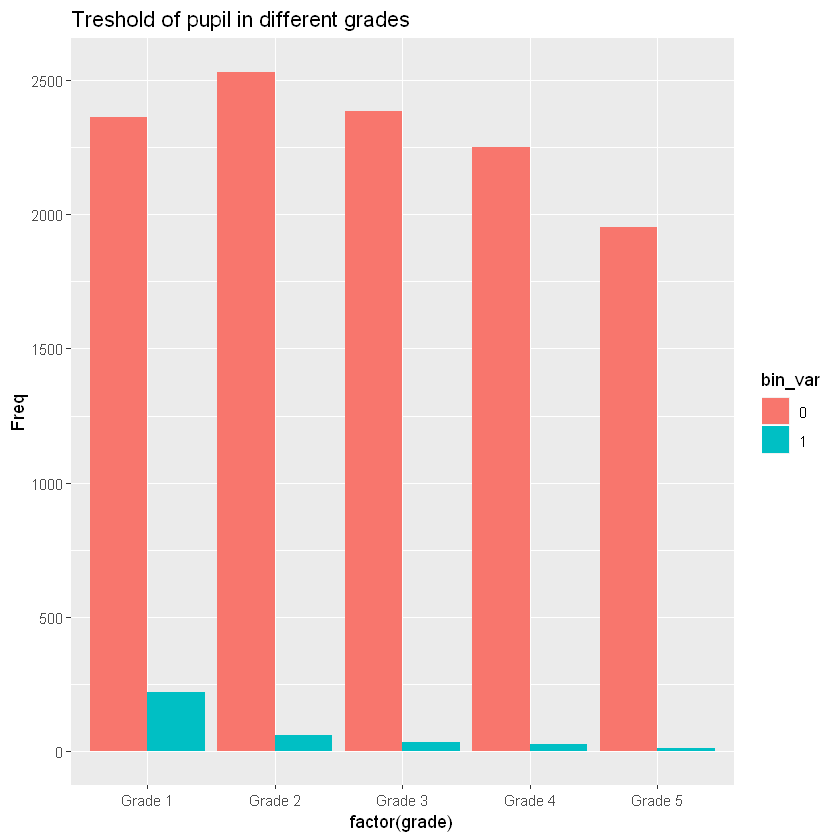

In [28]:
#create barplot of pupil under the treshold
ggplot(as.data.frame(plot_1), aes(factor(grade), Freq, fill= bin_var)) +
geom_col(position = 'dodge') + ggtitle('Treshold of pupil in different grades')

The figure above shows that across each grades, we have more numbers of pupil who reads above 10.

### Q4.

In [29]:
#
grade_bin_0 <- filter(all_data, grade == 'Grade 3' & bin_var == 0)
grade_bin_0

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,pupil_kpi,bin_var
108210,Grade 3,15898,129,0.7714286,1.0000000,94,83,629,0.7441860,Kiambu,Central,No,88.30,0
108210,Grade 3,15550,190,0.8571429,0.9333333,96,92,629,0.7441860,Kiambu,Central,No,95.83,0
108210,Grade 3,22388,40,0.2857143,0.3333333,96,84,629,0.7441860,Kiambu,Central,No,87.50,0
108210,Grade 3,26203,80,0.4571429,0.6333333,96,70,629,0.7441860,Kiambu,Central,No,72.92,0
108210,Grade 3,20478,103,0.7714286,0.8666667,94,76,629,0.7441860,Kiambu,Central,No,80.85,0
108210,Grade 3,1059,52,0.7428572,0.7333333,96,91,629,0.7441860,Kiambu,Central,No,94.79,0
108210,Grade 3,23323,96,0.6000000,0.8000000,83,66,629,0.7441860,Kiambu,Central,No,79.52,0
108210,Grade 3,9939,70,0.4285714,0.6000000,96,70,629,0.7441860,Kiambu,Central,No,72.92,0
108210,Grade 3,7293,30,0.4571429,0.8000000,96,62,629,0.7441860,Kiambu,Central,No,64.58,0
108210,Grade 3,24191,89,0.4285714,0.4333333,96,76,629,0.7441860,Kiambu,Central,No,79.17,0


In [30]:
unique_cout <- grade_bin_0 %>% distinct(school_id, bin_var) %>% group_by(school_id) %>% summarise ("freq" = n())
unique_cout

school_id,freq
416,1
792,1
5502,1
7956,1
8084,1
9342,1
10904,1
14475,1
16230,1
17404,1


In [31]:
unique_cout %>% filter(freq < 1 )

school_id,freq


In [32]:
grade_bin_1 <- filter(all_data, grade == 'Grade 3' & bin_var == 1)
grade_bin_1

school_id,grade,pupil_id,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,pupil_kpi,bin_var
136992,Grade 3,7795,7,0.28571430,0.10000000,99,91,568,0.92307692,Mombasa,Coast,No,91.92,1
206948,Grade 3,7655,8,0.34285715,0.10000000,96,86,337,0.72007366,Taita taveta,Coast,No,89.58,1
218688,Grade 3,19406,10,0.25714287,0.46666667,78,55,495,0.59668508,Kakamega,Western,No,70.51,1
218688,Grade 3,4514,10,0.31428573,0.26666668,78,60,495,0.59668508,Kakamega,Western,No,76.92,1
223941,Grade 3,22776,10,0.11428571,0.20000000,74,60,521,0.41751527,Eastern,Eastern,No,81.08,1
223941,Grade 3,21960,10,0.11428571,0.26666668,74,63,521,0.41751527,Eastern,Eastern,No,85.14,1
223941,Grade 3,3890,10,0.14285715,0.16666667,74,49,521,0.41751527,Eastern,Eastern,No,66.22,1
223941,Grade 3,19123,1,0.28571430,NA,74,51,521,0.41751527,Eastern,Eastern,No,68.92,1
223941,Grade 3,4281,1,0.11428571,0.06666667,74,50,521,0.41751527,Eastern,Eastern,No,67.57,1
223941,Grade 3,7447,1,0.28571430,0.06666667,74,59,521,0.41751527,Eastern,Eastern,No,79.73,1
